In [1]:
%matplotlib notebook

import numpy as np
import rasterio as rio
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
dataset = rio.open('data_files/ni_dtm.tif')

print('{} opened in {} mode'.format(dataset.name,dataset.mode))
print('image has {} band(s)'.format(dataset.count))
print('image size (width, height): {} x {}'.format(dataset.width, dataset.height))
print('band 1 dataype is {}'.format(dataset.dtypes[0])) # note that the band name (Band 1) differs from the list index [0]

data_files/ni_dtm.tif opened in r mode
image has 1 band(s)
image size (width, height): 3559 x 2867
band 1 dataype is int16


In [3]:
print(dataset.bounds)

BoundingBox(left=188566.0642, bottom=309840.3799, right=366516.0642, top=453190.3799)


In [4]:
print(dataset.crs)

EPSG:29902


In [5]:
img = dataset.read()

In [7]:
print(img.shape) # returns a tuple with the number of image bands bands, image height, and image width.
print(img[0]) # will return an IndexError, because while there are 7 bands, the indices range from 0 to 6.

(1, 2867, 3559)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
print(img[0, dataset.height // 2, dataset.width // 2]) # note that // performs floor division, as indices have to be integers

1271


In [9]:
centeri, centerj = dataset.height // 2, dataset.width // 2 # note that centeri corresponds to the row, and centerj the column
centerx, centery = dataset.transform * (centerj, centeri) # note the reversal here, from i,j to j,i
print(dataset.index(centerx, centery))
print((centeri, centerj) == dataset.index(centerx, centery)) # check that these are the same

(1433, 1779)
True


In [10]:
top, lft = dataset.index(centerx-500, centery+500)
bot, rgt = dataset.index(centerx+500, centery-500)

subset = dataset.read(window=((top, bot), (lft, rgt))) # format is (top, bottom), (left, right)

dataset.close() # remember to close the dataset now that we're done with it.

In [11]:
with rio.open('data_files/ni_dtm.tif') as dataset:
    img = dataset.read()
    xmin, ymin, xmax, ymax = dataset.bounds 

<IPython.core.display.Javascript object>


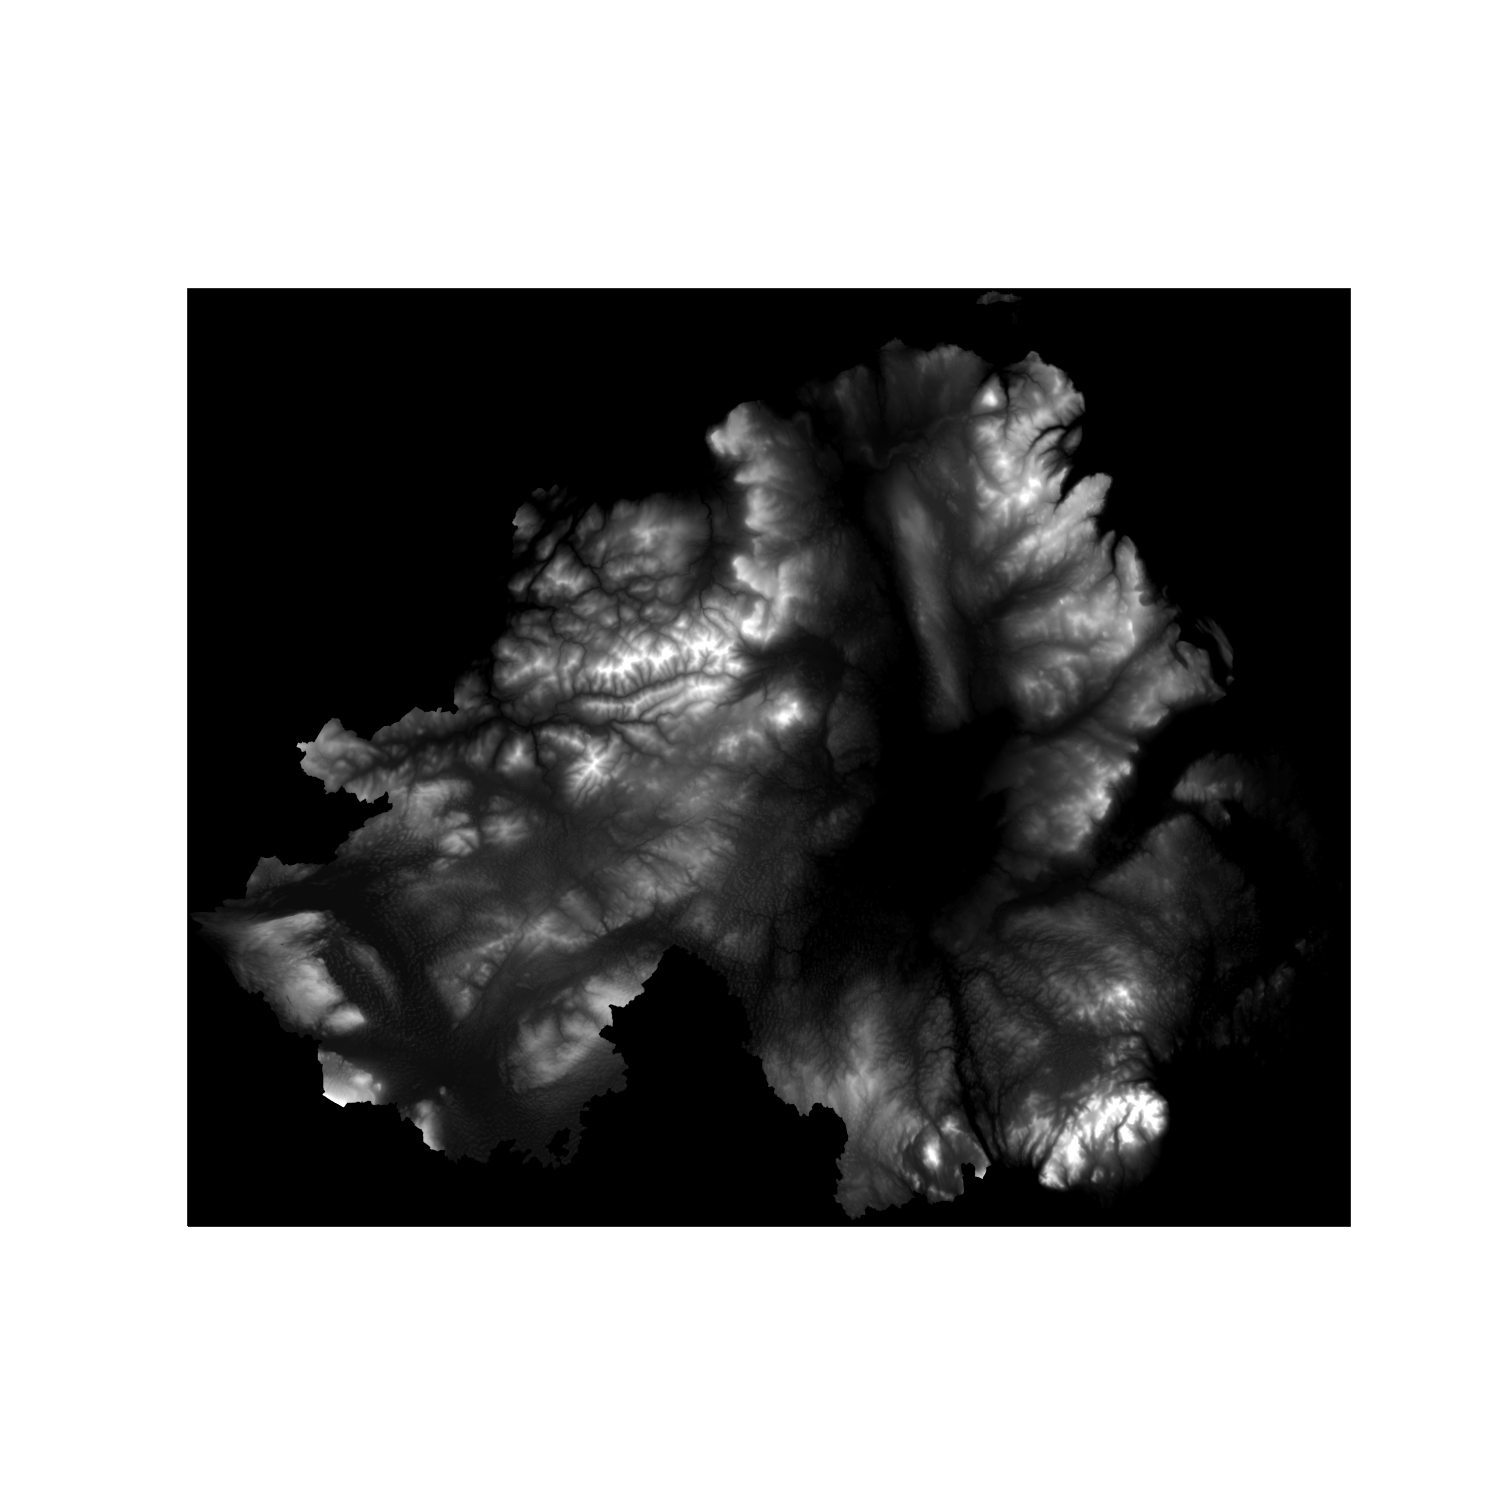

In [12]:
myCRS = ccrs.UTM(29) # note that this matches with the CRS of our image
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection=myCRS))

In [14]:
ax.imshow(img[0], cmap='gray', vmin=200, vmax=5000)

In [15]:
ax.imshow(img[0], cmap='gray', vmin=200, vmax=5000, transform=myCRS, extent=[xmin, xmax, ymin, ymax])

In [ ]:
ax.imshow(img[0:3], transform=myCRS, extent=[xmin, xmax, ymin, ymax])